# Prepare the data

In [1]:
# https://code.visualstudio.com/docs/datascience/data-science-tutorial
import numpy as np
import pandas as pd
data = pd.read_csv('titanic.csv')

In [2]:
data.replace('?', np.nan, inplace=True)
data = data.astype({'age':np.float64, 'fare':np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

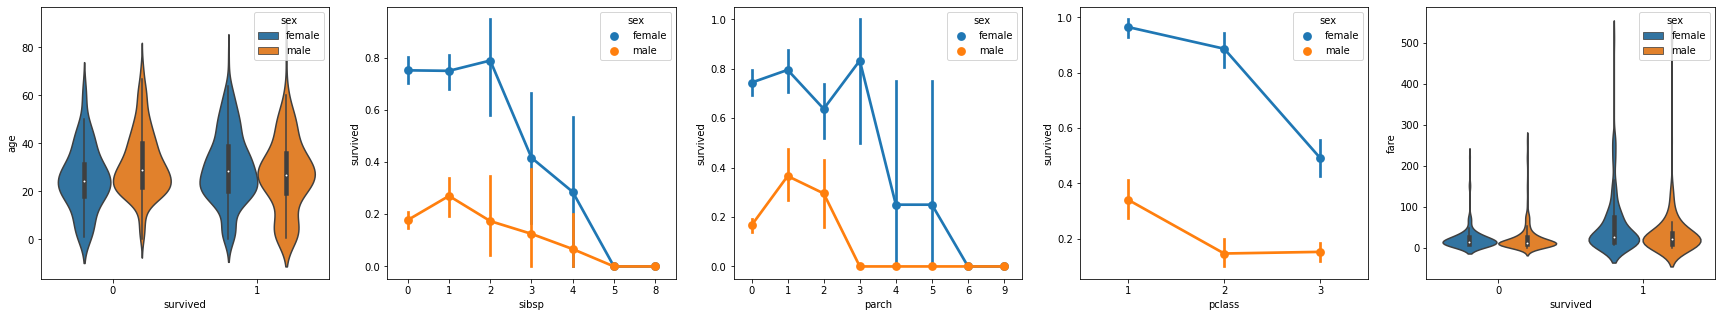

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [4]:
data.replace({'male': 1, 'female': 0}, inplace=True)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [5]:
data['relatives'] = data.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [6]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

# Train and evaluate a model

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [14]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


# Use a neural network to increase accuracy

In [23]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [24]:
model.add(Dense(5, kernel_initializer='uniform', activation='relu', input_dim=5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5945
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.5897
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6974
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.7536
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7584
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7715
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7715
Epoch 11/50
27/27 [

In [27]:
y_pred = model.predict_classes(X_test) 
print(metrics.accuracy_score(y_test, y_pred))

# model.predict_classes doesn't work, not sure if this code is correct either (https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes)
# y_pred = model.predict_classes(X_test) 
# y_classes=np.argmax(y_pred,axis=1)
# print(metrics.accuracy_score(y_test, y_classes))

AttributeError: 'Sequential' object has no attribute 'predict_classes'